## ch2 지도학습 - knn

* Machine Learning with sklearn @ DJ,Lim
* date : 20/04

* 지도학습은 대표적인 머신러닝 방법론중의 하나이다.
* 지도학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용.
* 지도학습에는 두가지 종류 <b>분류(classification), 회귀(regression)</b>이 있다. 
* knn은 사용자가 쉽게 이해할 수 있는 대표적인 지도학습 방법중에 하나로, 분류와 회귀에 다 사용된다.

### 학습 내용
* 01. 지도학습의 종류
* 02. knn 알고리즘 시각화
* 03. knn을 이용한 유방암 데이터 실습

### 01. 지도학습의 종류

### 분류(Classification)

* 분류는 가능성 있는 여러 클래스 레이블(class label)중 **하나를 예측하는 것**이다.
* 분류는 두개의 클래스로 분류하는 <b>이진 분류(binary classification)</b>과 셋 이상의 클래스로 분류하는 <b>다중 분류(multiclass classification)</b>로 나누어진다.
* 이진 분류는 질문의 답이 예/아니오 등의 예. 이진분류의 양성(positive) 클래스, 음성(negativ) 클래스라고 한다.

### 회귀(Regression)

* 회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 <b>부동소수점수(수학 용어로는 실수)를 예측</b>하는 것. 수치형 데이터를 예측.
* 예로는 어떤 사람의 나이, 키, 몸무게 정해진 수의 값이 아닌 해당 예측 값은 수치형 데이터.

### 02. knn 알고리즘 시각화
* 설치 : !pip install mglearn

In [1]:
import mglearn
import matplotlib.pyplot as plt

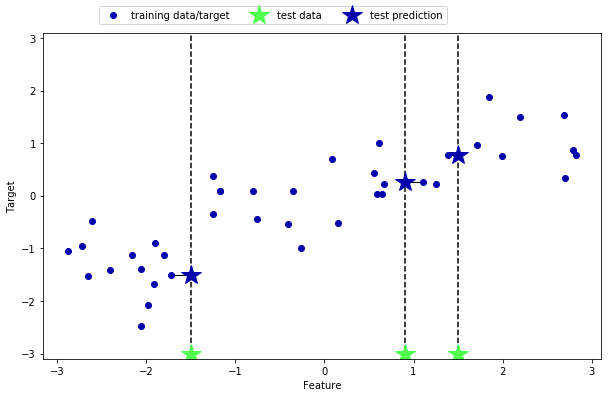

In [4]:
# knn의 k가 1인 경우의 알고리즘(회귀-수치형 값의 예측)
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\Users\Seoul IT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


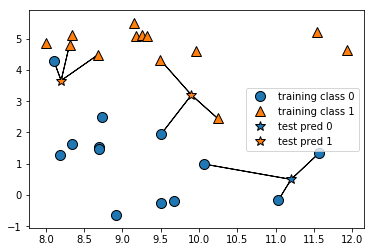

In [6]:
# knn의 k가 3인 경우의 알고리즘(분류- 범주형 값의 예측)
mglearn.plots.plot_knn_classification(n_neighbors=3);

### 일반화, 과대적합, 과소적합

* 모델이 처음보는 데이터에 대해 예측이 가능하다면 이를 훈련세트에서 테스트 세트로 **일반화(generalization)**되었다고 한다.
* 아주 복잡한 모델을 만든다면 훈련세트에만 정확한 모델이 된다.(과대적합)  
   * 과대적합(overfitting)는 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터가 일반화되기 어려울 때 발생.
* 반대로 모델이 너무 간단해서 잘 예측을 못함.(과소적합-underfitting)

### 03. 유방암 데이터 셋 실습

* 데이터 셋 : 위스콘신 유방암(Wisconsin Breast Cancer)데이터 셋
* 각 종양은 양성(benign-해롭지 않은 종양)과 악성(malignant-암 종양)


In [8]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [9]:
cancer = load_breast_cancer()
print('키 값은 {}' .format(cancer.keys()))
print('행렬의 값 : {}' .format(cancer.data.shape))

키 값은 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
행렬의 값 : (569, 30)


In [10]:
# feature 이름, class 이름
print('클래스 이름(target_names) : {}' .format(cancer['target_names']))   # 악성,양성
print()
print('특성 이름(feature_names) : {}' .format(cancer['feature_names']))

클래스 이름(target_names) : ['malignant' 'benign']

특성 이름(feature_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
from sklearn.model_selection import train_test_split

In [62]:
# 데이터 셋 나누기
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=cancer.target,   # 층화추출. 층별로 균등하게 추출
                                                    random_state=11)

In [63]:
# y_train, y_test 갯수
print('y_train 갯수 :', y_train.shape)
print('y_test 갯수 :', y_test.shape)

# y_train 안의 1,0 각각의 갯수
print('y_train 1의 갯수 :', (y_train==1).sum())
print('y_train 0의 갯수 :', (y_train==0).sum())

# y_test 안의 1,0 각각의 갯수
print('y_test 1의 갯수 :', (y_test==1).sum())
print('y_test 0의 갯수 :', (y_test==0).sum())

y_train 갯수 : (426,)
y_test 갯수 : (143,)
y_train 1의 갯수 : 267
y_train 0의 갯수 : 159
y_test 1의 갯수 : 90
y_test 0의 갯수 : 53


In [64]:
# y_train, y_test 비율 (75%, 25%)
rate1 = (426/(426+143))*100
rate2 = (143/(426+143))*100
print(rate1,rate2)

74.86818980667839 25.13181019332162


### 04 머신러닝 모델 만들고 예측하기

### 작업 단계
<pre>
(1) 모델 만들기
(2) 모델 학습 시키기(fit)
(3) 모델을 이용한 값 예측(predict)
(4) 훈련 데이터를 이용한 정확도 확인
(5) 테스트 데이터를 이용한 정확도 확인
</pre>

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# 모델 만들기
model = KNeighborsClassifier()

In [67]:
# 모델 학습시키기
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
# 모델을 이용한 값 예측
pred = model.predict(X_test)

In [69]:
# 테스트 데이터를 이용한 정확도 확인
print(np.mean(pred==y_test))
# (pred == y_test).sum() / len(pred)

0.9230769230769231


### 05. k의 값에 따른 정확도 확인해 보기

In [70]:
acc=[]
max_k=0
max_acc=0

for i in range(1,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    tmp_acc = (pred == y_test).sum() / len(pred)
    
    if i%10==0:
        print(i, tmp_acc)   # i가 10의 배수일때마다 정확도를 봄
    
    # 정확도비교 (높은 정확도가 나오면 변경)
    acc.append(tmp_acc)
    if max_acc < tmp_acc:
        max_k = i
        max_acc = tmp_acc
        
print(max_k, max_acc)

10 0.9370629370629371
20 0.9370629370629371
30 0.9440559440559441
40 0.9440559440559441
50 0.9440559440559441
60 0.951048951048951
70 0.951048951048951
80 0.958041958041958
90 0.9370629370629371
100 0.9370629370629371
74 0.958041958041958


In [75]:
import pandas as pd
i = range(1,101)
accuracy = pd.DataFrame({'k':i, 'accuracy':acc})

,k,accuracy
0,1,0.902098
1,2,0.902098
2,3,0.916084
3,4,0.909091
4,5,0.923077


In [78]:
accuracy.to_csv('accuracy.csv', index=False)